In [ ]:
!pip install matplotlib --upgrade

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kde
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, cross_val_predict
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, r2_score

##Reading file and drpping useless columns

In [ ]:
initial_data = pd.read_csv('student-mat.csv', sep=';')
initial_data['Grad_avg'] = (initial_data['G1']+initial_data['G2']+initial_data['G3'])/3
initial_data.drop(columns=['reason', 'G1', 'G2', 'G3'], inplace=True)

##General Correlation

In [ ]:
#Turning binary columns into booleans so they're counted into the correlation matrix.
num_data = initial_data.copy()
num_data['schoolsup'] = [1 if line == 'yes' else 0 for line in initial_data['schoolsup']]
num_data['famsup'] = [1 if line == 'yes' else 0 for line in initial_data['famsup']]
num_data['paid'] = [1 if line == 'yes' else 0 for line in initial_data['paid']]
num_data['activities'] = [1 if line == 'yes' else 0 for line in initial_data['activities']]
num_data['nursery'] = [1 if line == 'yes' else 0 for line in initial_data['nursery']]
num_data['higher'] = [1 if line == 'yes' else 0 for line in initial_data['higher']]
num_data['internet'] = [1 if line == 'yes' else 0 for line in initial_data['internet']]
num_data['romantic'] = [1 if line == 'yes' else 0 for line in initial_data['romantic']]

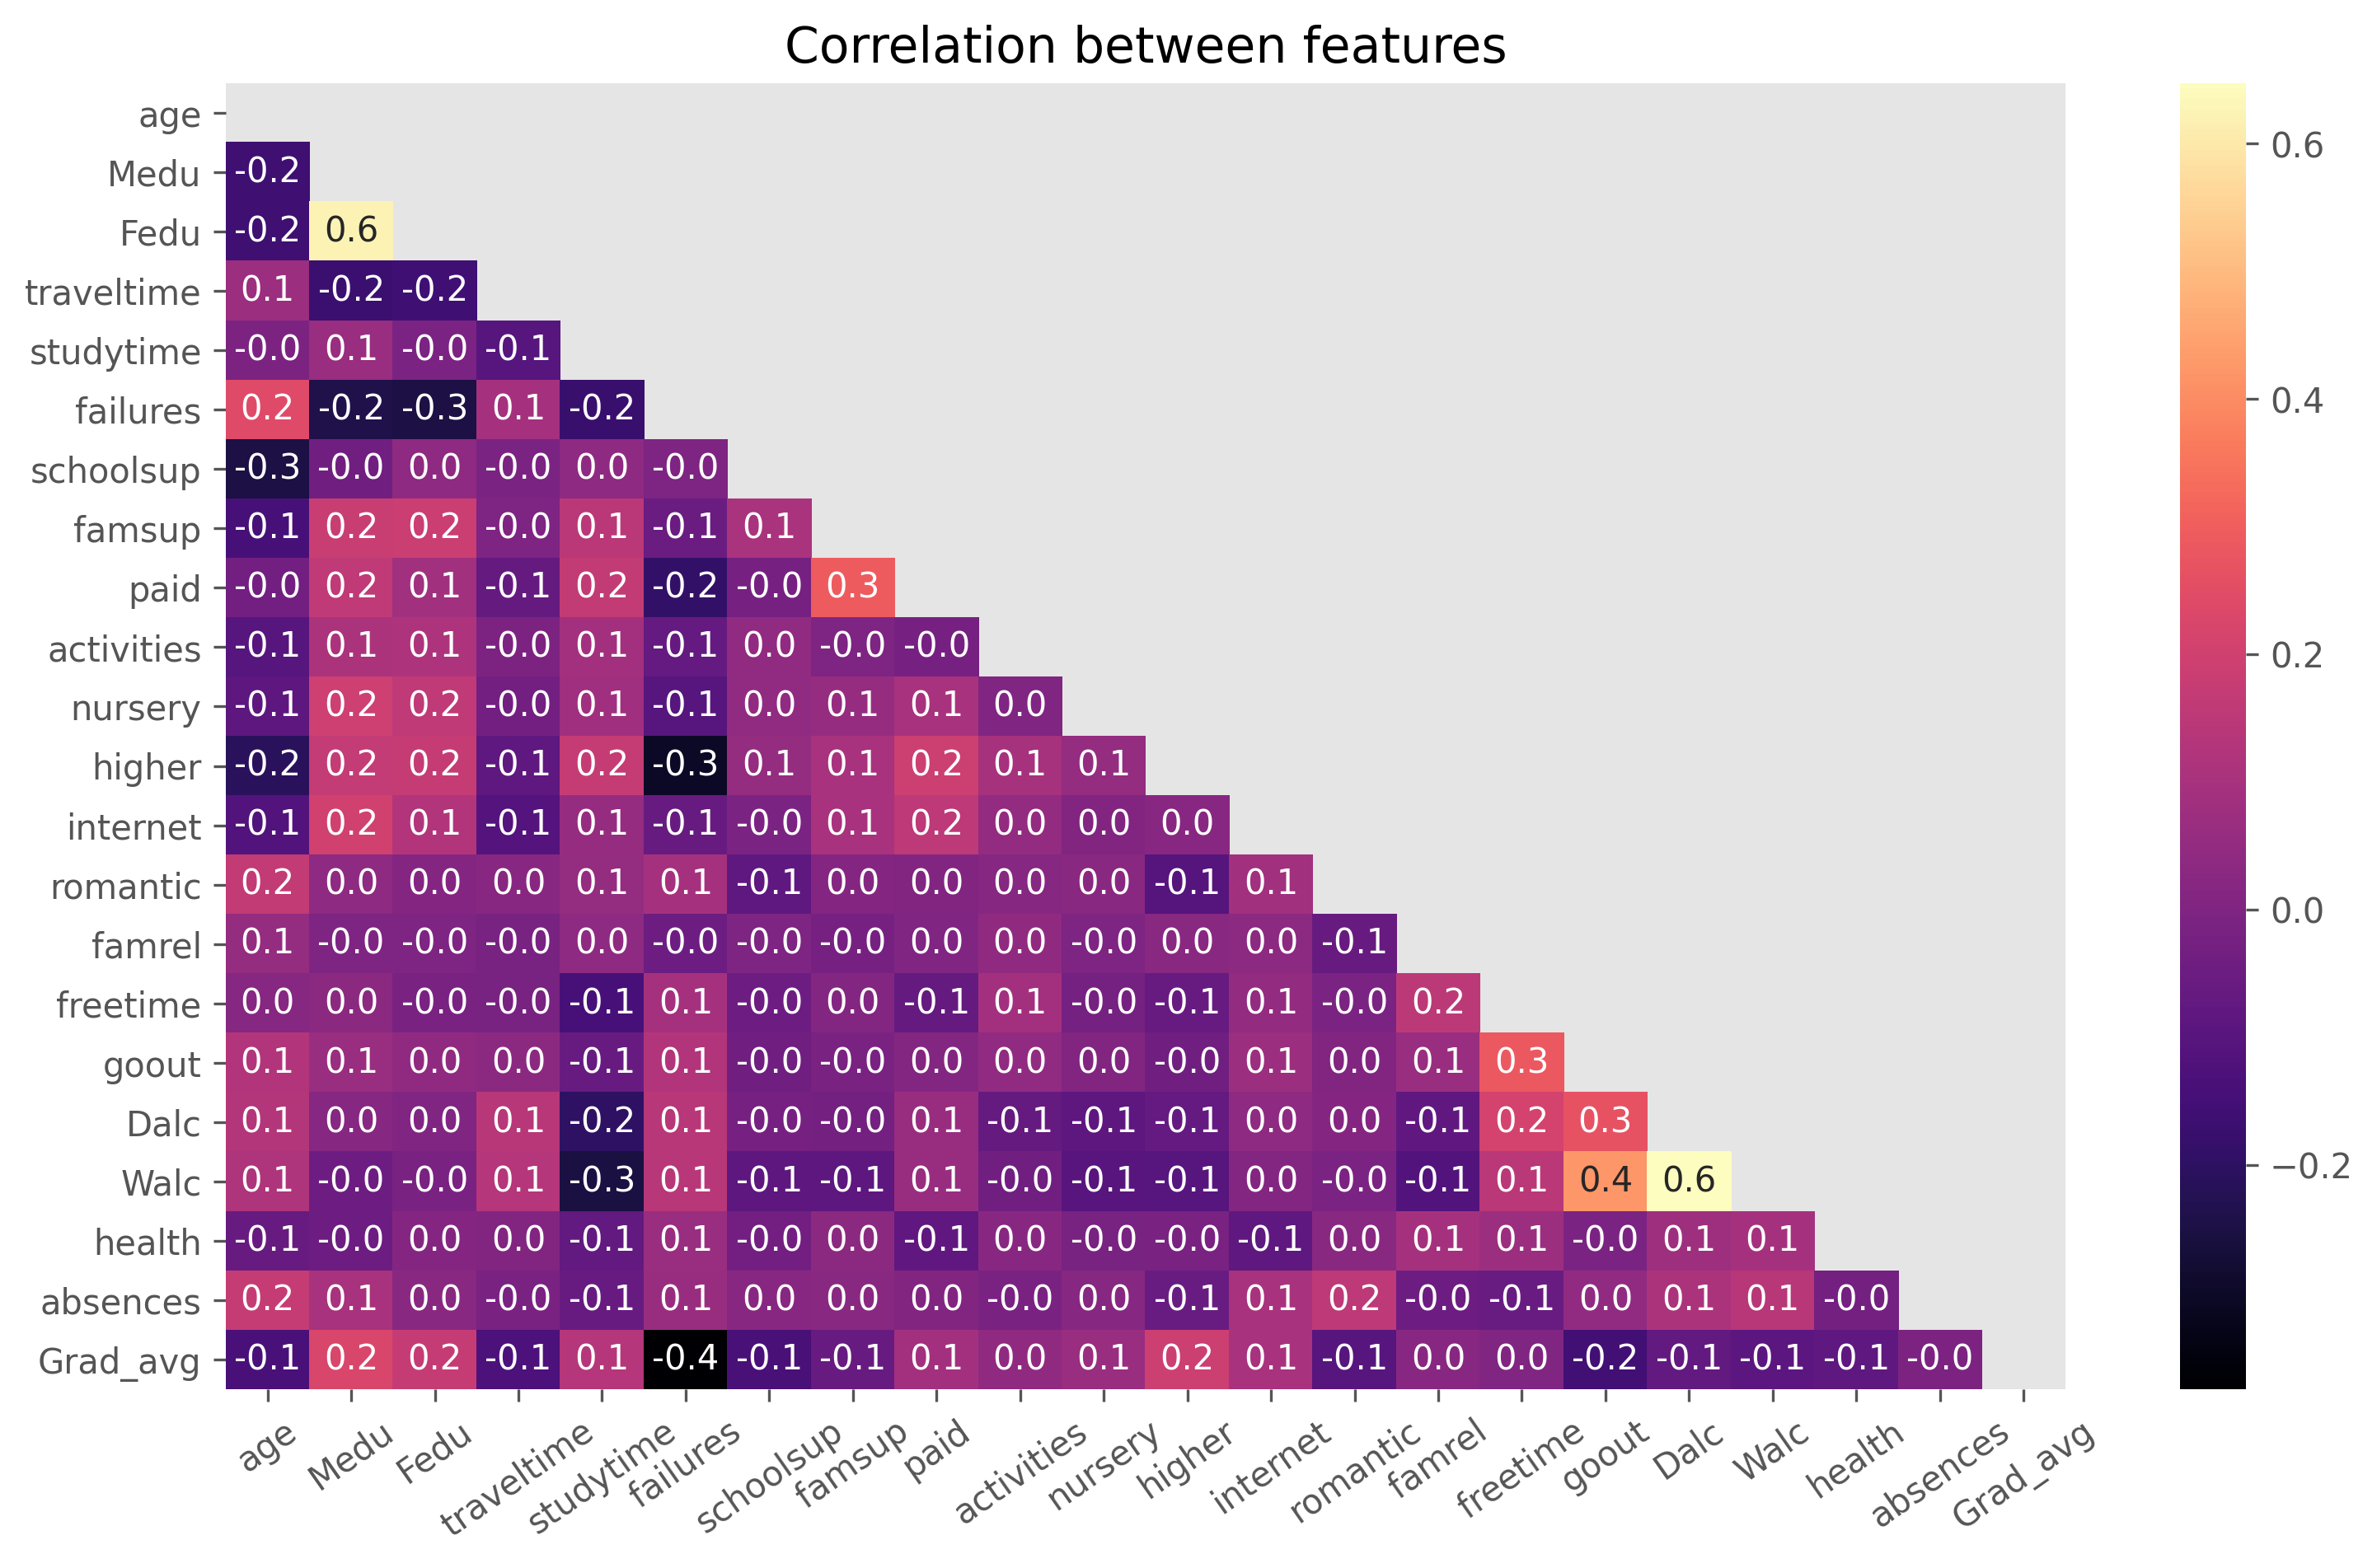

In [ ]:

plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(12,7), dpi=300)

ax.set_title('Correlation between features')
corr = num_data.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
 
sns.heatmap(corr, annot=True, fmt='.1f', mask=mask, ax=ax, cmap='magma')
plt.xticks(rotation=35)

plt.savefig('corr_map.png')

##Plotting The Main Categorical Features Difference

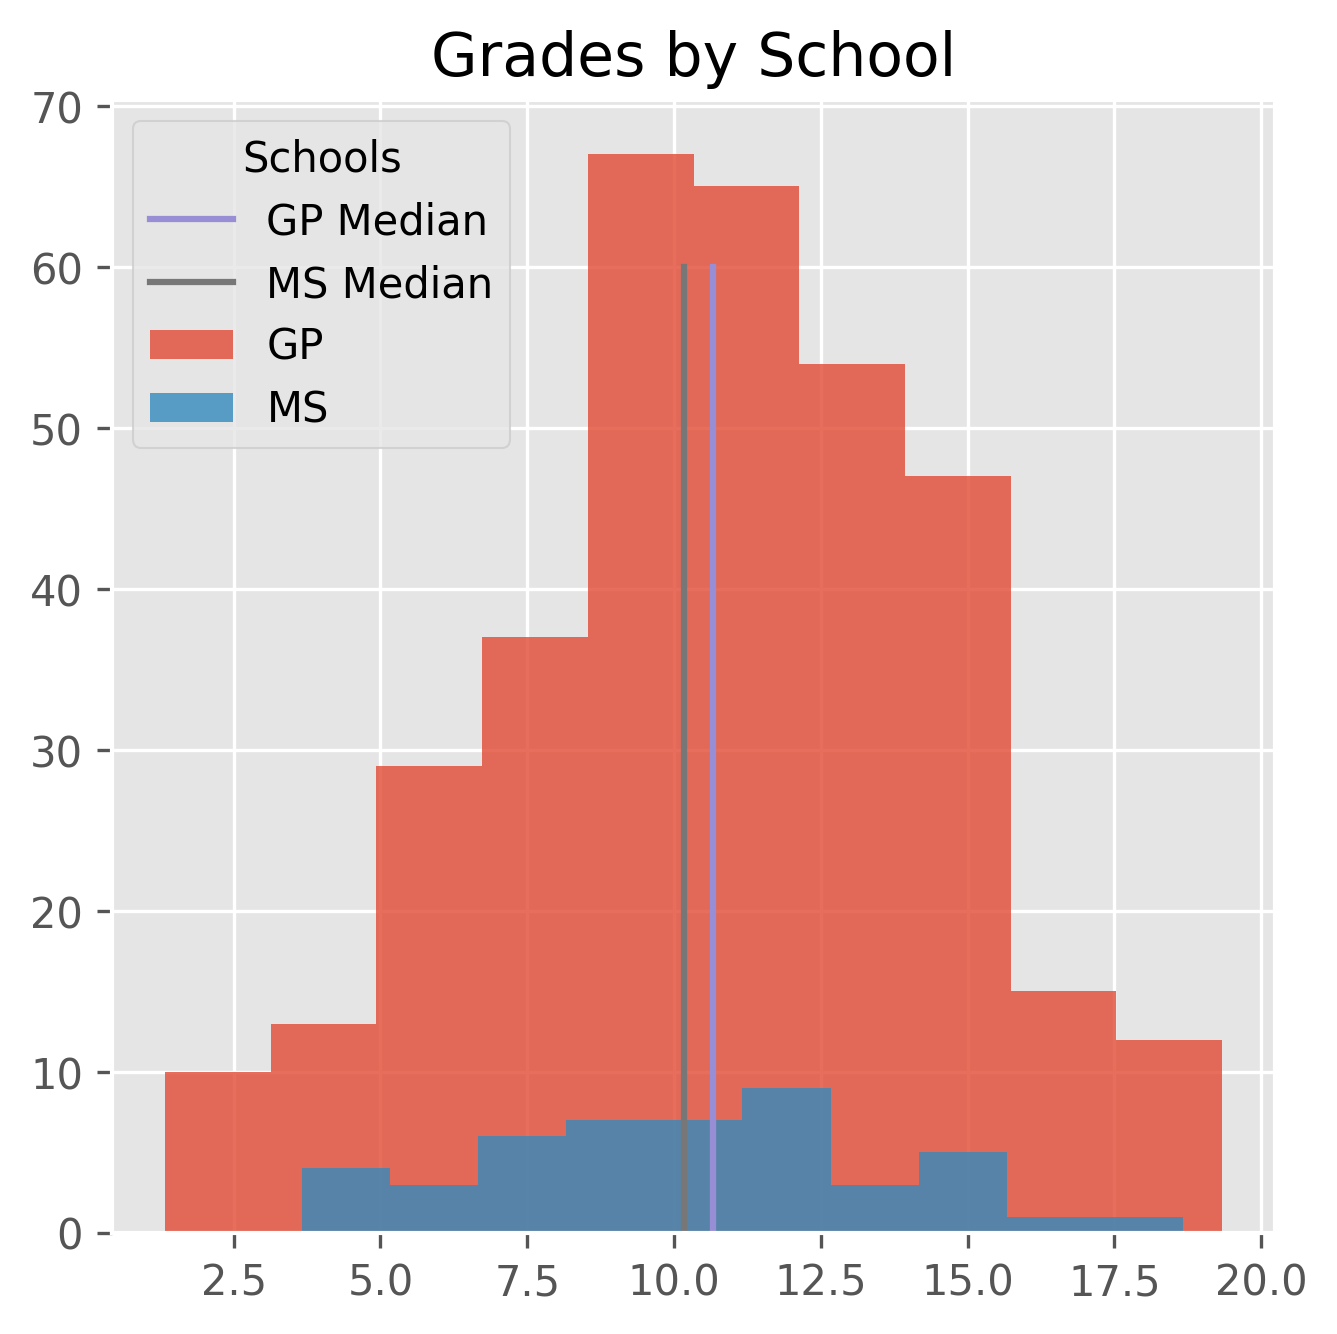

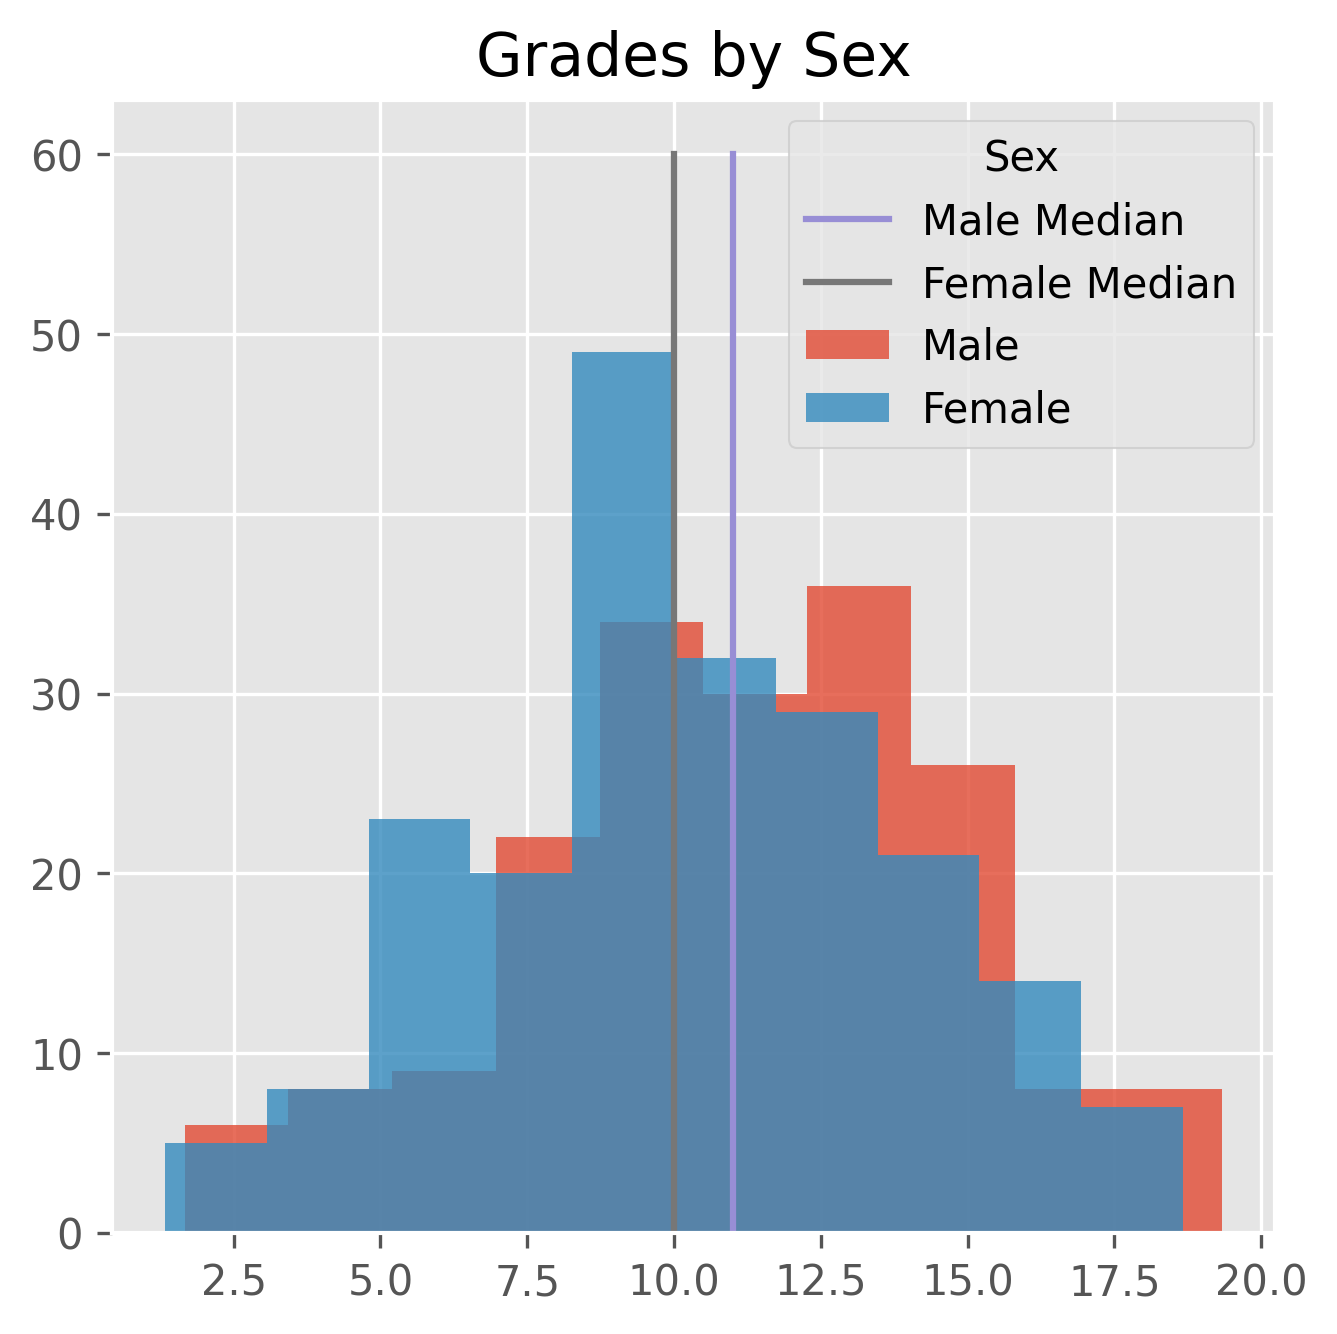

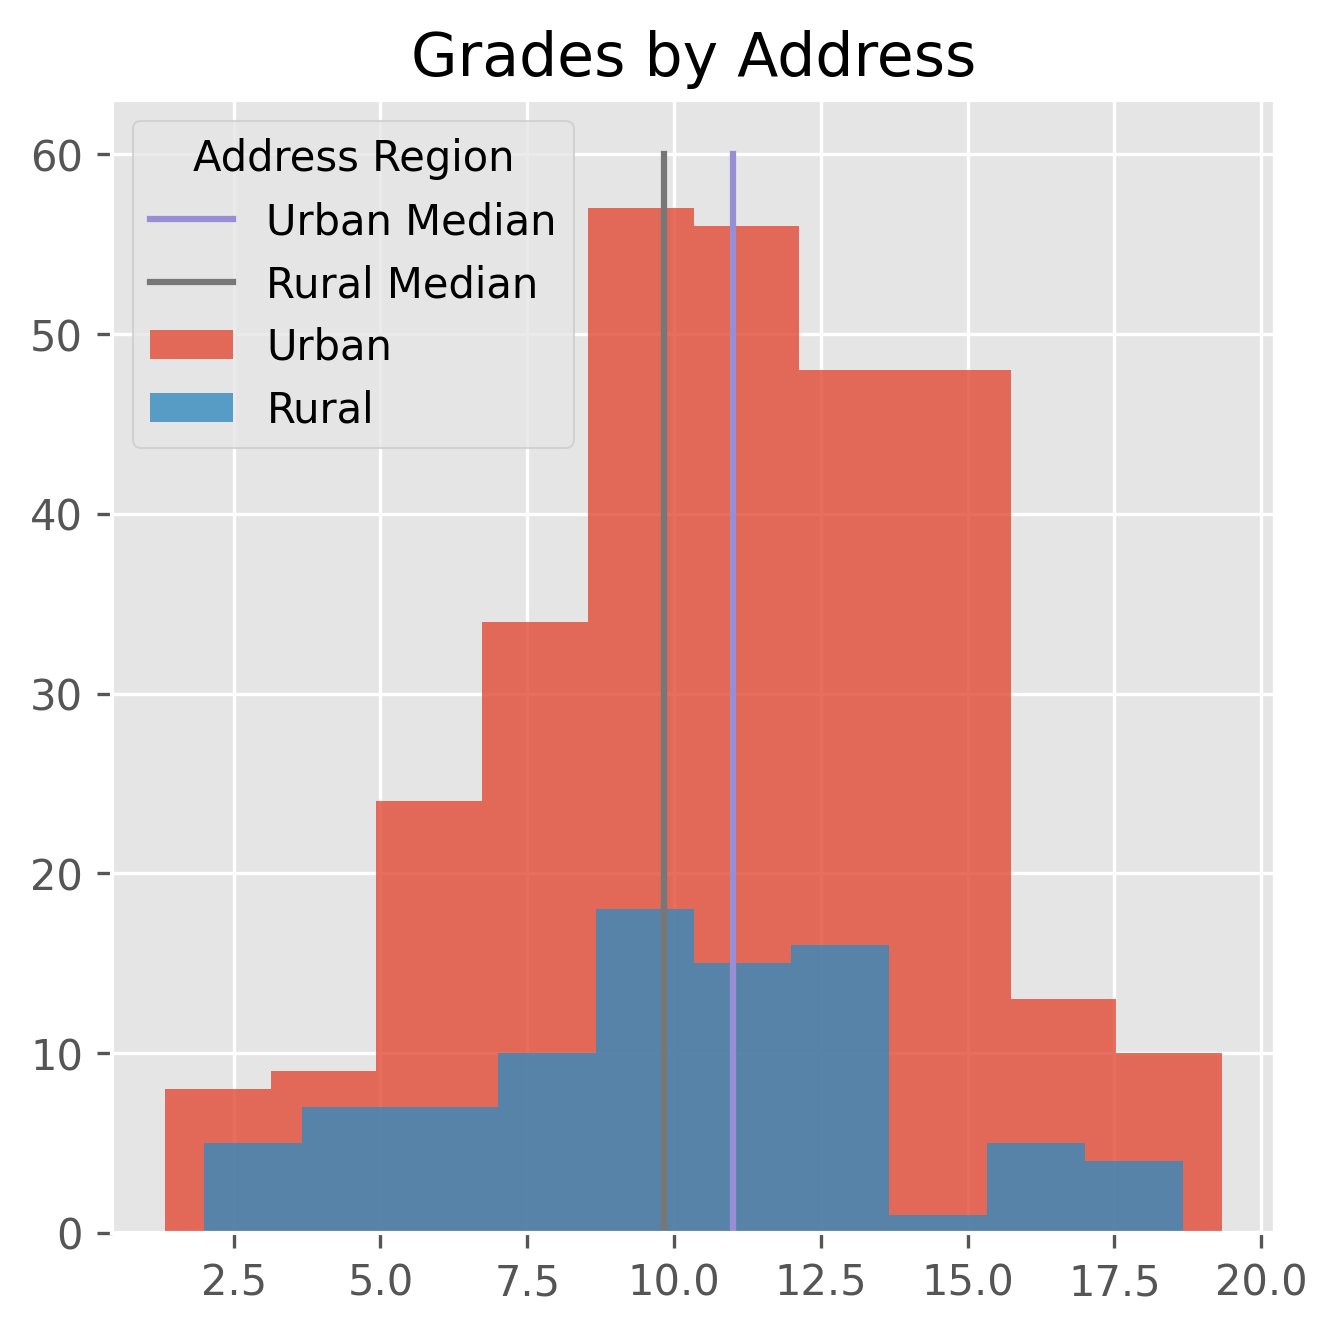

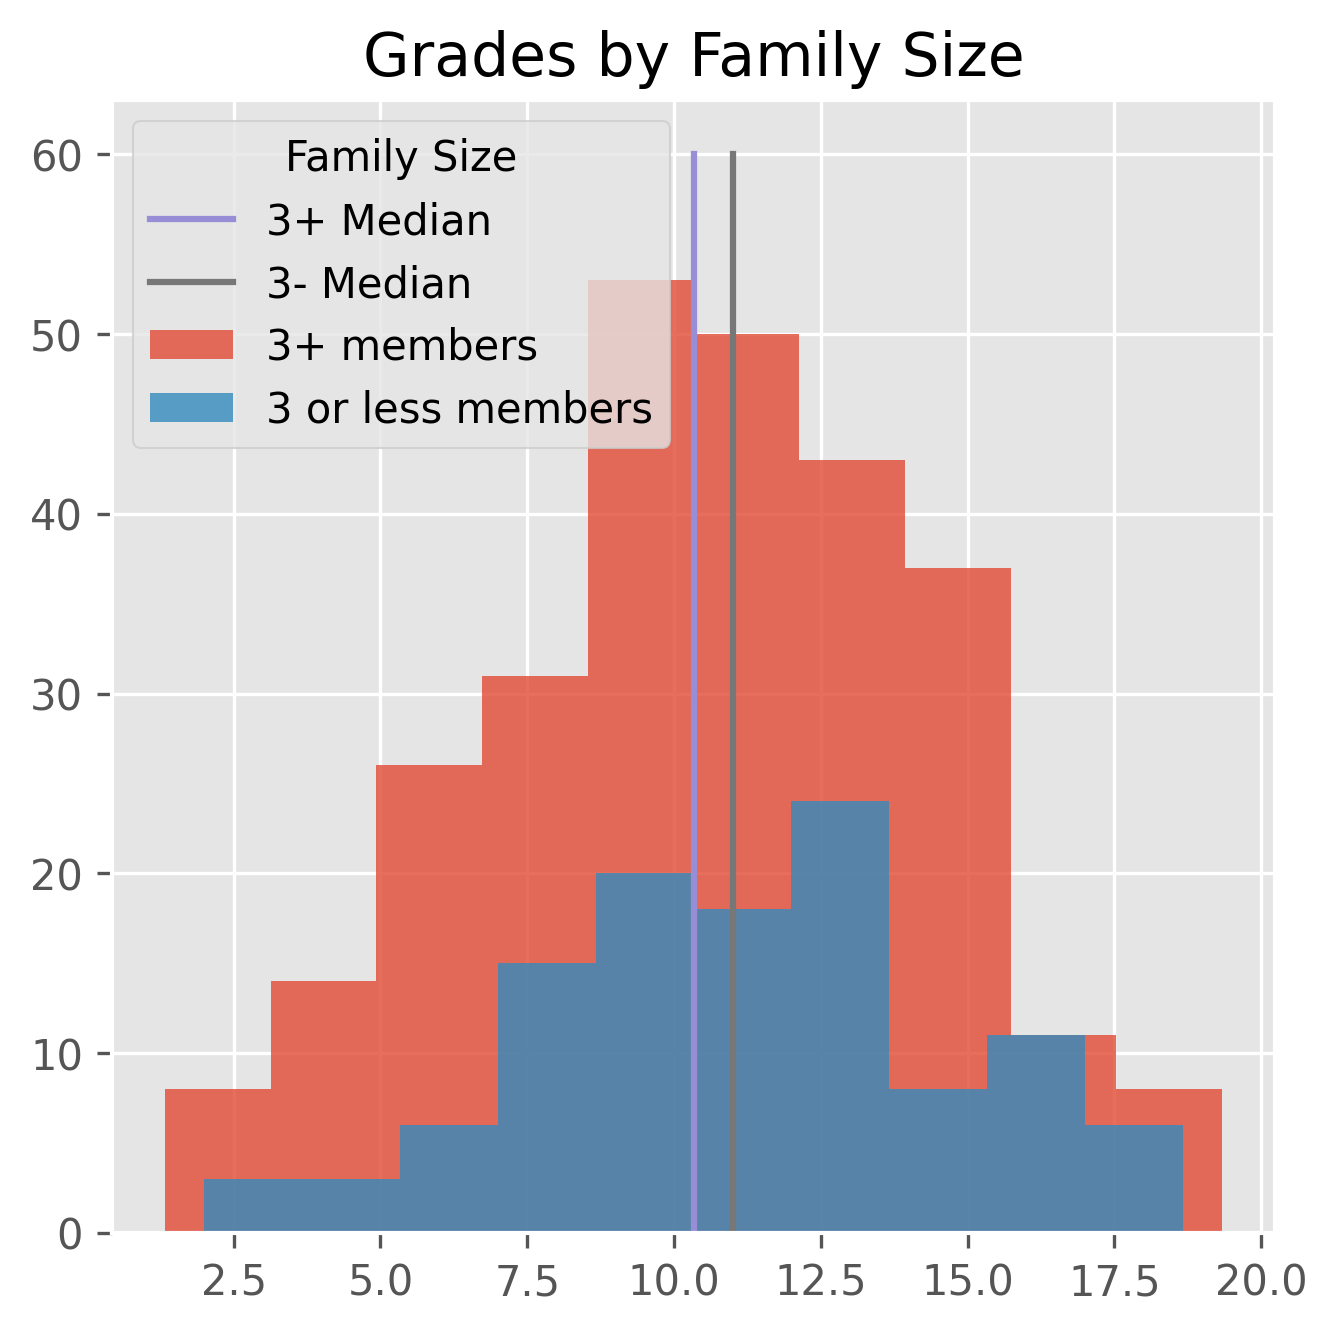

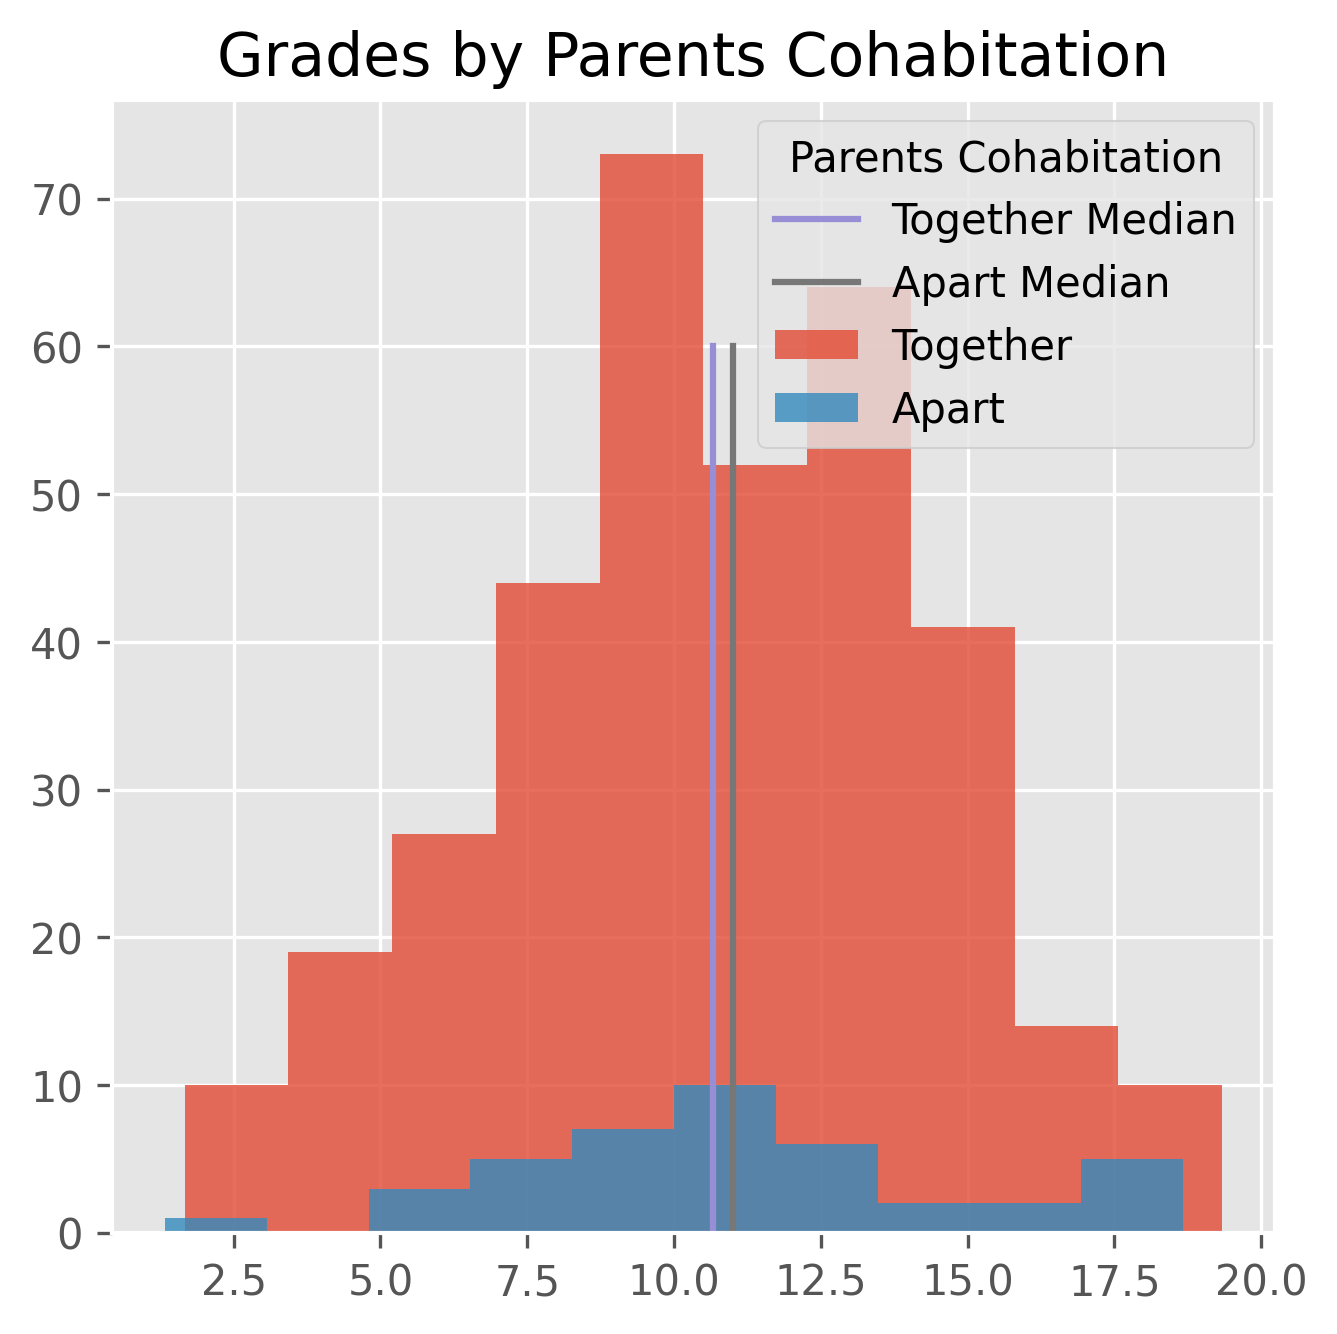

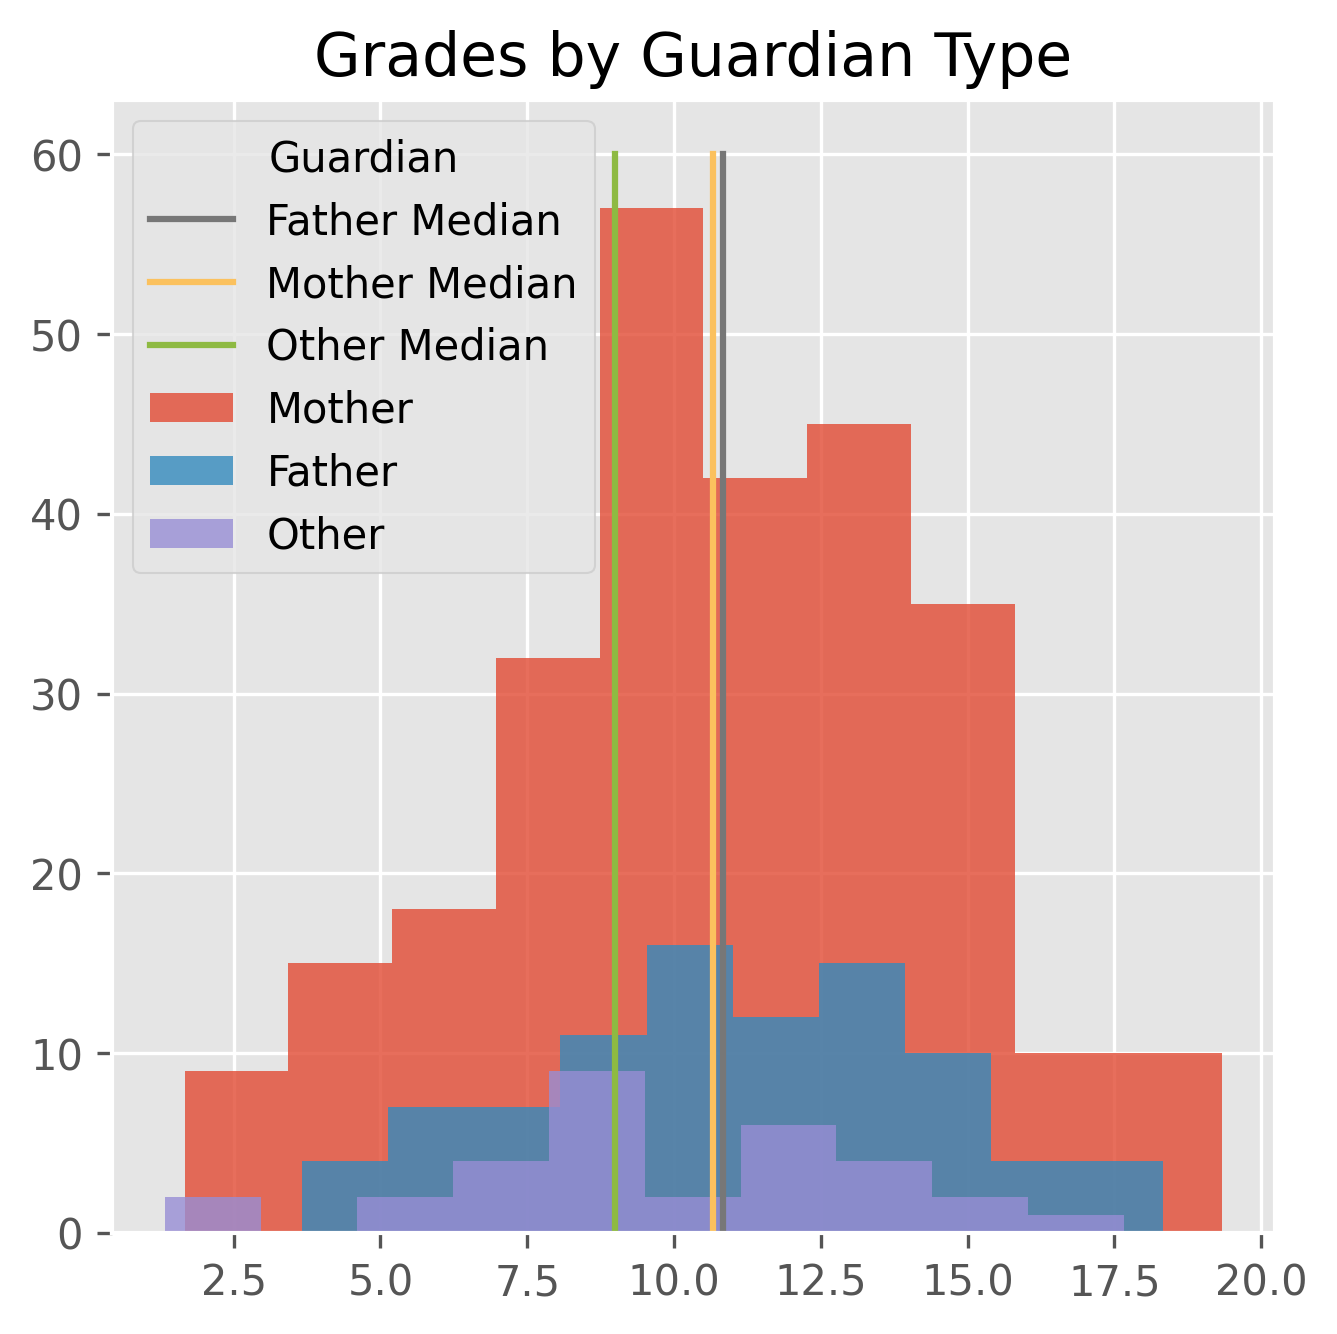

In [ ]:
#Difference by Schools

GP_data = initial_data[initial_data['school'] == 'GP']
MS_data = initial_data[initial_data['school'] == 'MS']
 
fig, ax = plt.subplots(figsize=(5,5), dpi=300)

ax.hist(GP_data['Grad_avg'], label='GP', alpha=0.8)
ax.hist(MS_data['Grad_avg'], label='MS', alpha=0.8)
ax.plot([GP_data['Grad_avg'].median(),GP_data['Grad_avg'].median()],[0,60], label='GP Median')
ax.plot([MS_data['Grad_avg'].median(),MS_data['Grad_avg'].median()],[0,60], label='MS Median')
ax.legend(title='Schools',loc=0)
ax.set_title('Grades by School')

fig.savefig('diff_school.png')

#Difference by Sex

M_data = initial_data[initial_data['sex'] == 'M']
F_data = initial_data[initial_data['sex'] == 'F']
 
fig, ax = plt.subplots(figsize=(5,5), dpi=300)

ax.hist(M_data['Grad_avg'], label='Male', alpha=0.8)
ax.hist(F_data['Grad_avg'], label='Female', alpha=0.8)
ax.plot([M_data['Grad_avg'].median(),M_data['Grad_avg'].median()],[0,60], label='Male Median')
ax.plot([F_data['Grad_avg'].median(),F_data['Grad_avg'].median()],[0,60], label='Female Median')
ax.legend(title='Sex',loc=0)
ax.set_title('Grades by Sex')

fig.savefig('diff_sex.png')

#Difference by Address

U_data = initial_data[initial_data['address'] == 'U']
R_data = initial_data[initial_data['address'] == 'R']
 
fig, ax = plt.subplots(figsize=(5,5), dpi=300)

ax.hist(U_data['Grad_avg'], label='Urban', alpha=0.8)
ax.hist(R_data['Grad_avg'], label='Rural', alpha=0.8)
ax.plot([U_data['Grad_avg'].median(),U_data['Grad_avg'].median()],[0,60], label='Urban Median')
ax.plot([R_data['Grad_avg'].median(),R_data['Grad_avg'].median()],[0,60], label='Rural Median')
ax.legend(title='Address Region',loc=0)
ax.set_title('Grades by Address')

fig.savefig('diff_add.png')

#Difference by Family Size

bigfam_data = initial_data[initial_data['famsize'] == 'GT3']
smallfam_data = initial_data[initial_data['famsize'] == 'LE3']
 
fig, ax = plt.subplots(figsize=(5,5), dpi=300)

ax.hist(bigfam_data['Grad_avg'], label='3+ members', alpha=0.8)
ax.hist(smallfam_data['Grad_avg'], label='3 or less members', alpha=0.8)
ax.plot([bigfam_data['Grad_avg'].median(),bigfam_data['Grad_avg'].median()],[0,60], label='3+ Median')
ax.plot([smallfam_data['Grad_avg'].median(),smallfam_data['Grad_avg'].median()],[0,60], label='3- Median')
ax.legend(title='Family Size',loc=0)
ax.set_title('Grades by Family Size')

fig.savefig('diff_fams.png')

#Difference by Parents Cohabitation

TG_data = initial_data[initial_data['Pstatus'] == 'T']
AP_data = initial_data[initial_data['Pstatus'] == 'A']
 
fig, ax = plt.subplots(figsize=(5,5), dpi=300)

ax.hist(TG_data['Grad_avg'], label='Together', alpha=0.8)
ax.hist(AP_data['Grad_avg'], label='Apart', alpha=0.8)
ax.plot([TG_data['Grad_avg'].median(),TG_data['Grad_avg'].median()],[0,60], label='Together Median')
ax.plot([AP_data['Grad_avg'].median(),AP_data['Grad_avg'].median()],[0,60], label='Apart Median')
ax.legend(title='Parents Cohabitation',loc=0)
ax.set_title('Grades by Parents Cohabitation')

fig.savefig('diff_cohab.png')

#Difference by Guardian

fat_data = initial_data[initial_data['guardian'] == 'father']
mom_data = initial_data[initial_data['guardian'] == 'mother']
ot_data = initial_data[initial_data['guardian'] == 'other']
 
fig, ax = plt.subplots(figsize=(5,5), dpi=300)

ax.hist(mom_data['Grad_avg'], label='Mother', alpha=0.8)
ax.hist(fat_data['Grad_avg'], label='Father', alpha=0.8)
ax.hist(ot_data['Grad_avg'], label='Other', alpha=0.8)
ax.plot([fat_data['Grad_avg'].median(),fat_data['Grad_avg'].median()],[0,60], label='Father Median')
ax.plot([mom_data['Grad_avg'].median(),mom_data['Grad_avg'].median()],[0,60], label='Mother Median')
ax.plot([ot_data['Grad_avg'].median(),ot_data['Grad_avg'].median()],[0,60], label='Other Median')
ax.legend(title='Guardian',loc=0)
ax.set_title('Grades by Guardian Type')

fig.savefig('diff_guard.png')

##Difference by parents professions

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 5.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 24.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 11.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


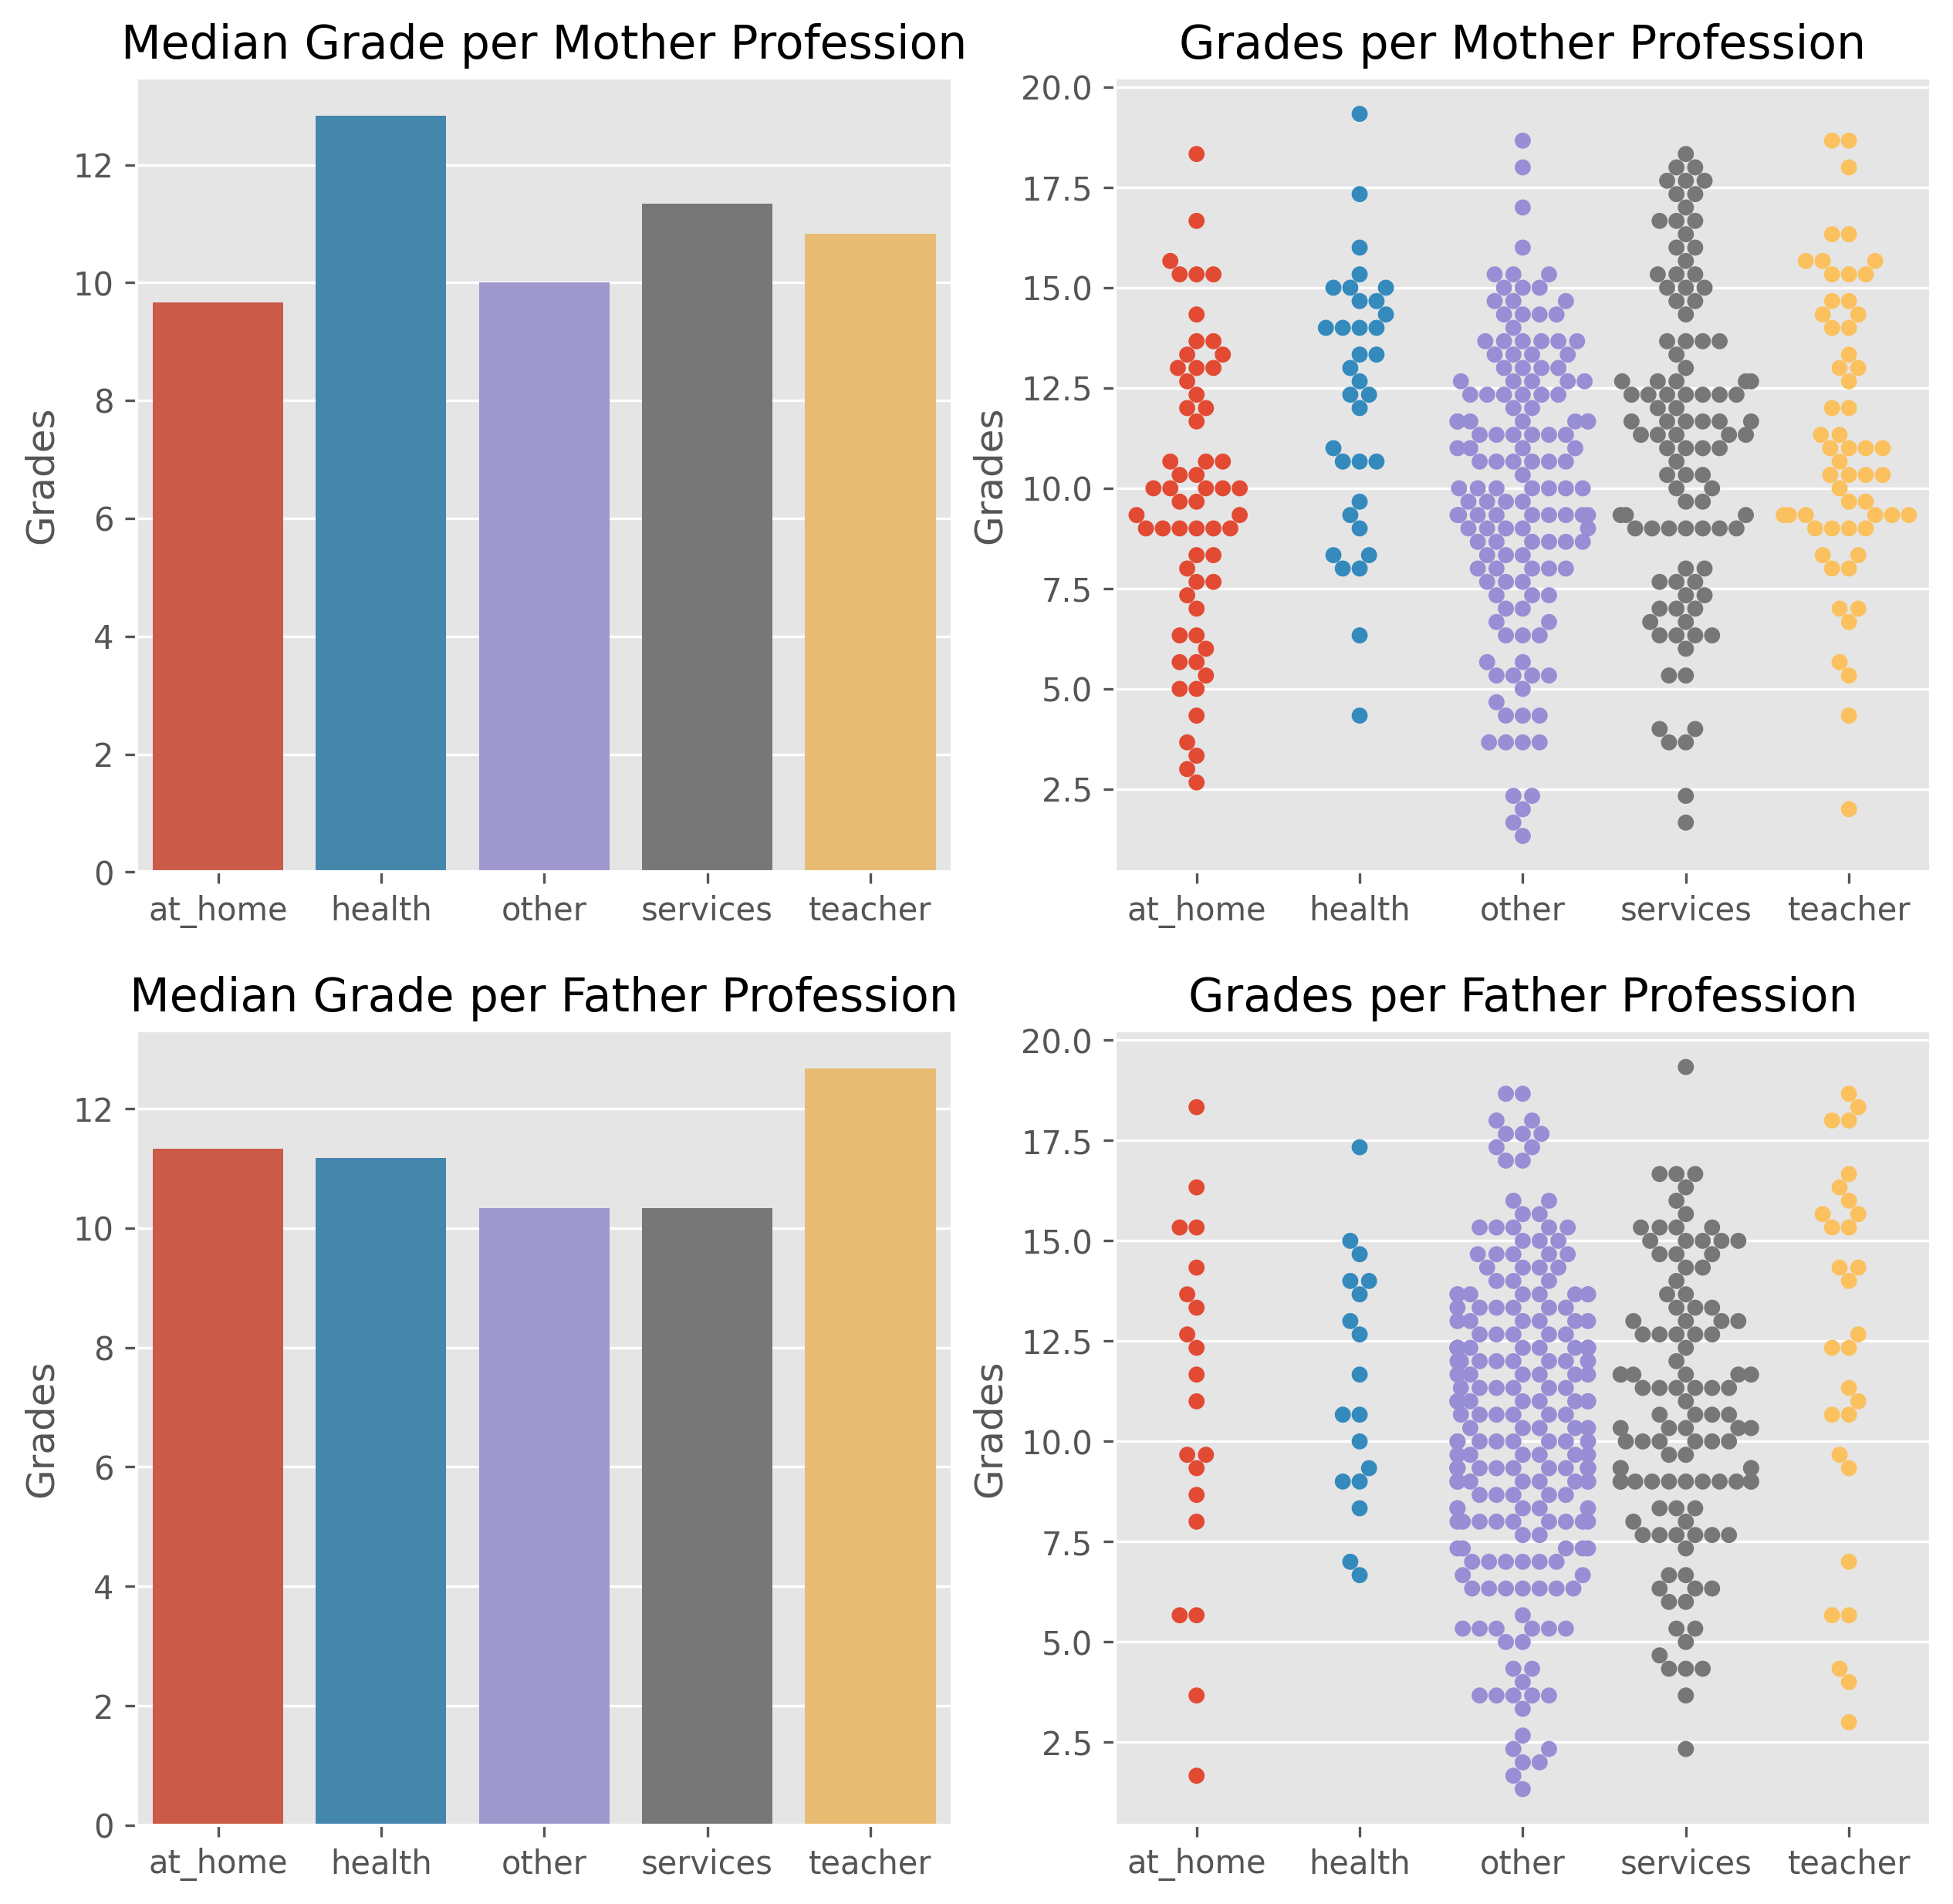

In [ ]:
#By Mother's job
mj = initial_data.groupby('Mjob')['Grad_avg'].median()

fig, ax = plt.subplots(nrows=2 ,ncols=2 ,figsize=(10,10), dpi=300)
ax[0,0].set_title('Median Grade per Mother Profession')
sns.barplot(x=mj.index, y=mj.values, ax=ax[0,0]).set(xlabel='', ylabel='Grades')

ax[0,1].set_title('Grades per Mother Profession')
sns.swarmplot(x=initial_data['Mjob'], y=initial_data['Grad_avg'], ax=ax[0,1],
              order=mj.index).set(xlabel='', ylabel='Grades')

#By Father's job
fj = initial_data.groupby('Fjob')['Grad_avg'].median()


ax[1,0].set_title('Median Grade per Father Profession')
sns.barplot(x=fj.index, y=fj.values, ax=ax[1,0]).set(xlabel='', ylabel='Grades')

ax[1,1].set_title('Grades per Father Profession')
sns.swarmplot(x=initial_data['Fjob'], y=initial_data['Grad_avg'], ax=ax[1,1],
              order=fj.index).set(xlabel='', ylabel='Grades')

fig.savefig('par_jobs')

In [ ]:
#Investigating a little deeper why at_home affects so much (because they usually also have lower education)
initial_data.groupby('Mjob')['Medu'].median()

Mjob
at_home     2
health      4
other       2
services    3
teacher     4
Name: Medu, dtype: int64

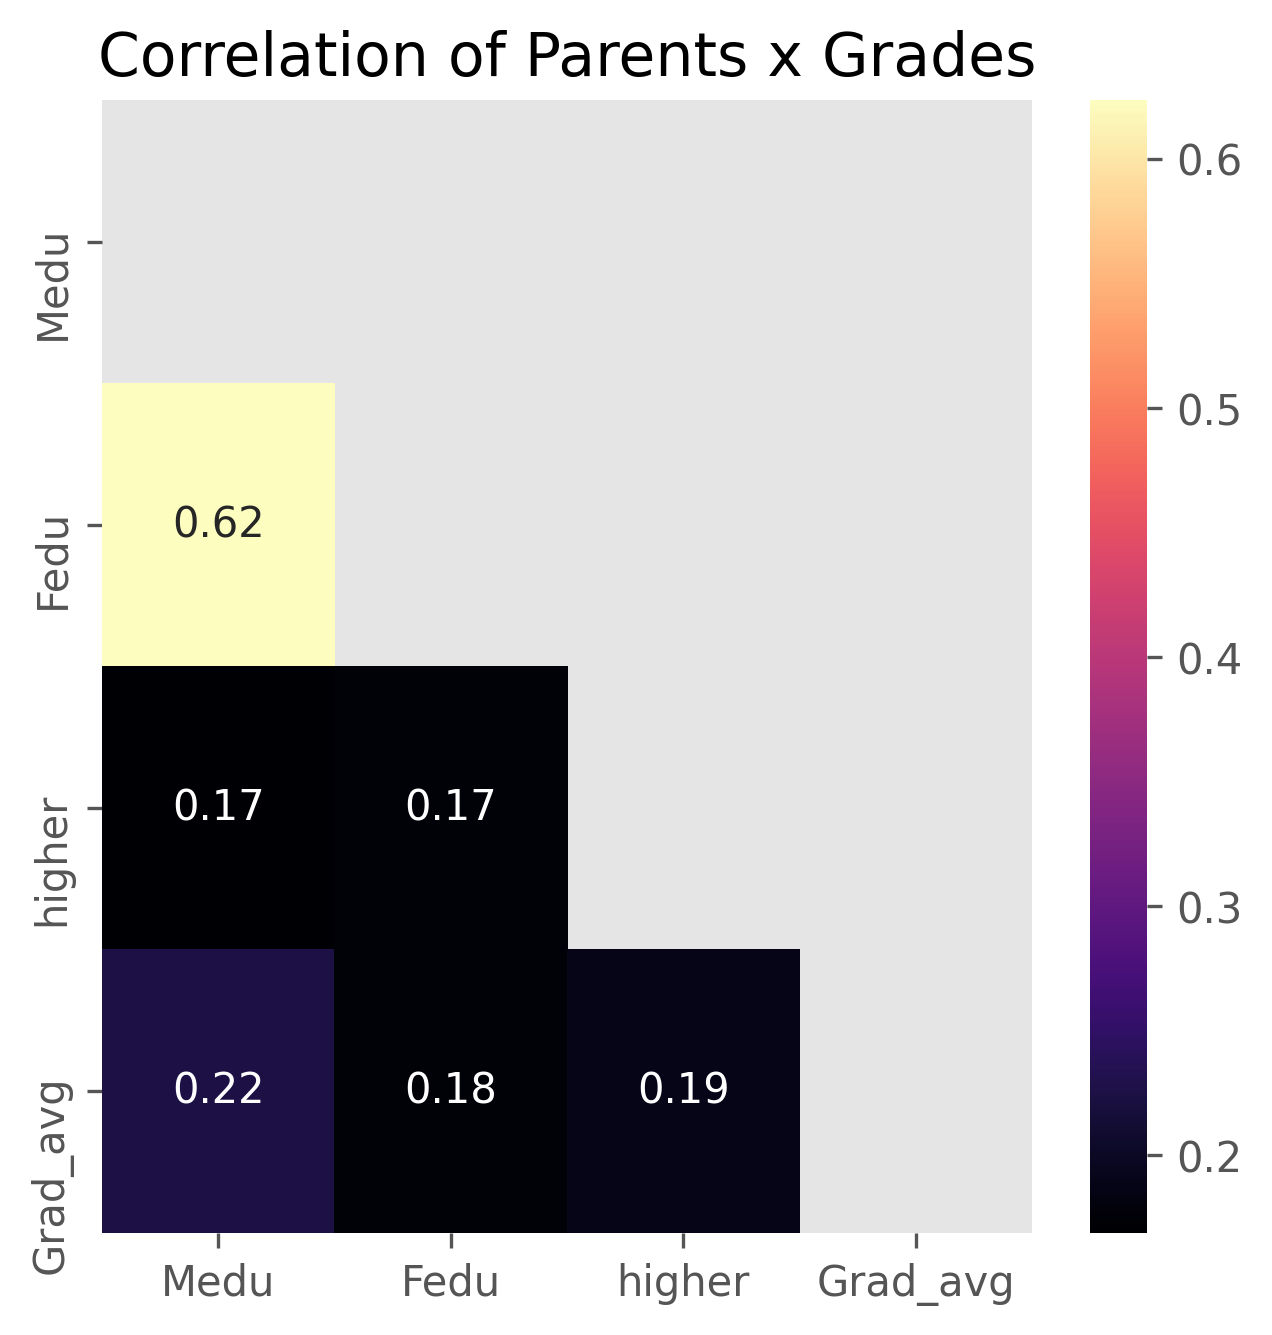

In [ ]:
MF_data = num_data.loc[:, ['Medu', 'Fedu', 'higher', 'Grad_avg']].corr()

fig, ax = plt.subplots(figsize=(5,5), dpi=300)
ax.set_title('Correlation of Parents x Grades')

mask = np.triu(np.ones_like(MF_data, dtype=bool))
sns.heatmap(data=MF_data, annot=True, mask=mask, cmap='magma')

plt.savefig('corr_parents.png')

##Creating a model to predict grades

In [ ]:
#Based on previous analysis, I'll be choosing the relevant numerical features to consider in the predictions.
relevant_num = num_data.loc[:,['age', 'Medu', 'Fedu',
       'traveltime', 'studytime', 'failures',
       'schoolsup', 'famsup', 'paid', 'nursery', 'higher',
       'internet', 'romantic', 'goout', 'Dalc', 'Walc',
       'health']]
#We still need to add Mjob, Fjob and guardian as categorical relevant features

In [ ]:
#Transforming our categorical values into numbers
M_jobarr = pd.get_dummies(num_data['Mjob'], prefix='M', dtype=float)
F_jobarr = pd.get_dummies(num_data['Fjob'], prefix='F', dtype=float)
guardian_arr = pd.get_dummies(num_data['guardian'], prefix='G', dtype=float)

In [ ]:
#Merging these relevant attributes in a single dataframe
relevant = relevant_num.join([M_jobarr, F_jobarr, guardian_arr])

In [ ]:
#Creating a category for the grades based on the pressumption that 60% grade means approved.
Grad_cat = [1 if line > 14 else 0 for line in initial_data['Grad_avg']]

In [ ]:
#Spliting the values for Training and Testing
X = relevant.values
y = Grad_cat
 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

##Applying Logistic Regression

In [ ]:
model1 = LogisticRegression(max_iter=1000, solver='liblinear')
#model1.fit(X_train,y_train)
#y_pred = model1.predict(X_test)
 
predic1 = cross_val_predict(model1, X, y, cv=5)
scor1 = accuracy_score(y, predic1)

print("Accuracy:", scor1)

Accuracy: 0.810126582278481


##Tuning the model

In [ ]:
 
#Turning every categorical variable into numerical so we can use the correlation matrix to choose our model's features.
 
categorical_vals = ['school', 'sex', 'address', 'famsize', 'Pstatus',
       'Mjob', 'Fjob', 'guardian']
 
num_data2 = num_data.copy().drop(columns=categorical_vals)
 
for catin in categorical_vals:
  cat_df = pd.get_dummies(num_data[catin], prefix=catin, dtype=float)
  num_data2 = num_data2.join(cat_df)

In [ ]:

#Creating a feature that defines if the children is approved or not based on the assumption that 70% grade average is the requirement.
 
num_data2['Grad_status'] = [1 if line >= 14 else 0 for line in num_data2['Grad_avg']]
 
length = len(num_data2.columns) - 2
 
#Creating a loop that trains many different models with different amounts of features based on the most correlated to the approval of the student.
#The loop then prints the amount of features and the accuracies.

best_scor = {'Range': 0, 'Accuracy': 0}

for it in range(3, length):

  indexes = num_data2.corr().abs()['Grad_status'].sort_values(ascending=False)[2:it].index
  X = num_data2.loc[:, indexes].values
  y = num_data2['Grad_status'].values
 
  model = LogisticRegression(max_iter=1000, solver='liblinear')
  predic = cross_val_predict(model, X, y, cv=5)
  scor = accuracy_score(y, predic)
 
  if scor >= best_scor['Accuracy']:
    best_scor['Range'] = it
    best_scor['Accuracy'] = scor

print("Range:", best_scor['Range'], ", Accuracy:", best_scor['Accuracy'])

Range: 19 , Accuracy: 0.8253164556962025


In [ ]:
 
#Now that we know that 19 features is the optimal, let's take a look at these important features.
 
indexes = num_data2.corr().abs()['Grad_status'].sort_values(ascending=False)[2:best_scor['Range']].index
X = num_data2.loc[:, indexes].values
y = num_data2['Grad_status'].values
 
model = LogisticRegression(max_iter=1000, solver='liblinear')
predic = cross_val_predict(model, X, y, cv=5)
scor = accuracy_score(y, predic)
indexes

Index(['Medu', 'failures', 'Fjob_teacher', 'schoolsup', 'Dalc', 'Mjob_health',
       'Mjob_other', 'Fedu', 'Walc', 'address_U', 'address_R', 'Fjob_other',
       'traveltime', 'higher', 'age', 'internet', 'absences'],
      dtype='object')